In [1]:
import pkg_resources

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd 

from tpoint.fitting import mc_tpoint, best_fit_pars
from tpoint.visualization import plot_corner, pointing_azel_resid, pointing_histogram, pointing_residuals
from tpoint.io import read_azel_datfile
from tpoint.transform import tpoint

In [2]:
datafile = pkg_resources.resource_filename("tpoint", os.path.join("test_data", "k_and_e.dat"))
coo_ref, coo_meas = read_azel_datfile(datafile)
idata = mc_tpoint(coo_ref, coo_meas)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [el_sigma, az_sigma, tx, tf, npae, ca, aw, an, ie, ia]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 80 seconds.


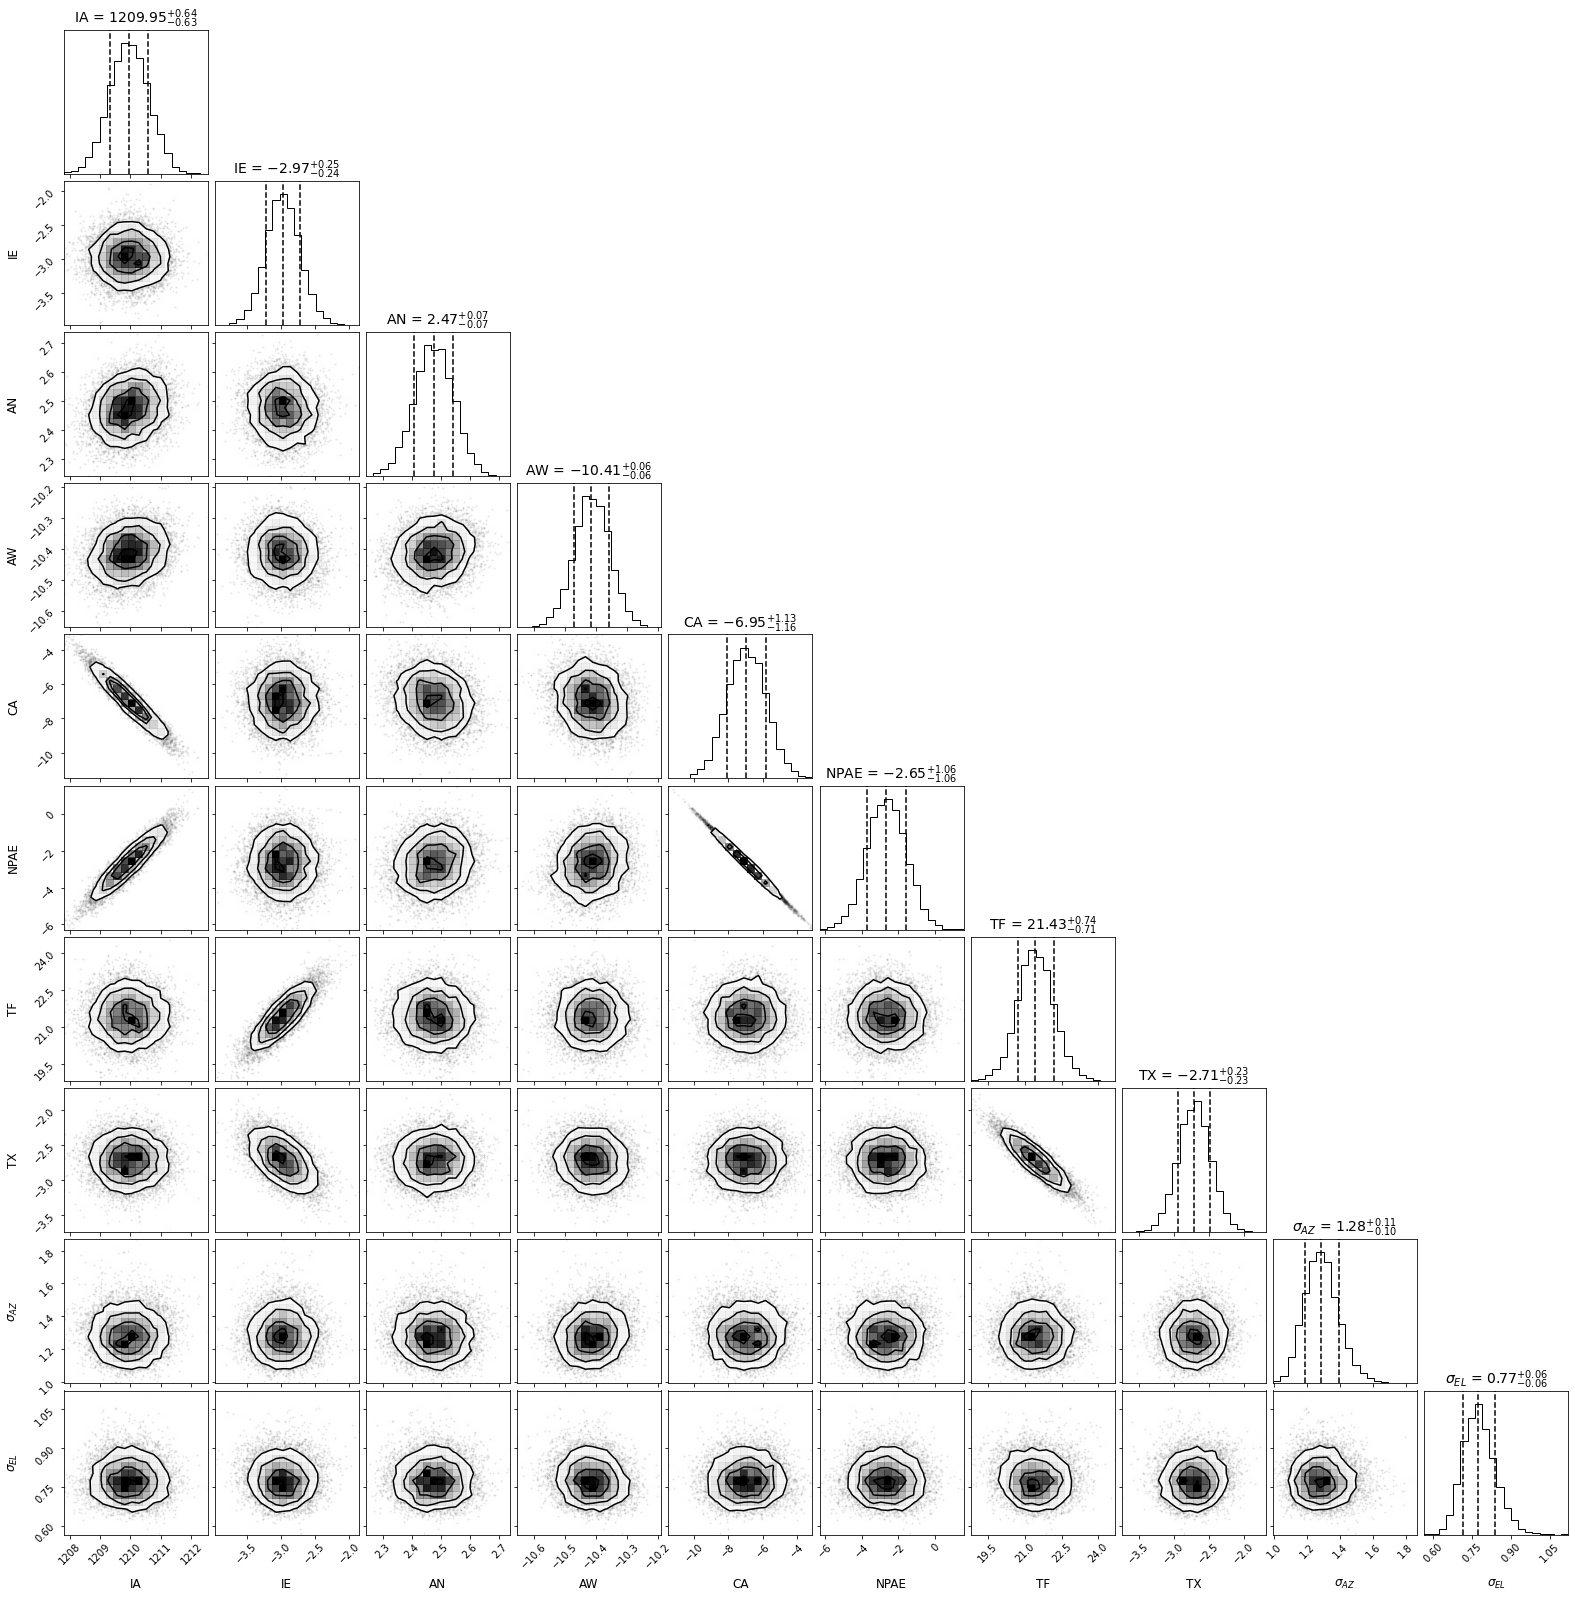

In [3]:
f = plot_corner(idata)

In [13]:
pars = best_fit_pars(idata)
pars

{'ia': 1209.95162101,
 'ie': -2.97013998,
 'an': 2.47414382,
 'aw': -10.4130497,
 'ca': -6.95013749,
 'npae': -2.65231927,
 'tf': 21.44407976,
 'tx': -2.70850863}

In [11]:
mc_coo = tpoint(coo_meas, **pars)

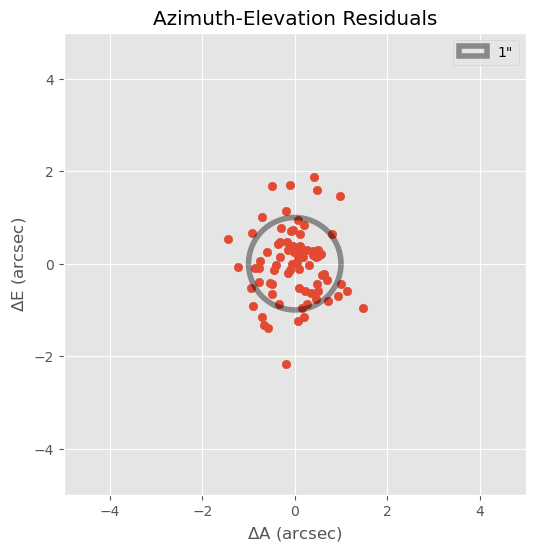

In [12]:
f = pointing_residuals(coo_ref, mc_coo)

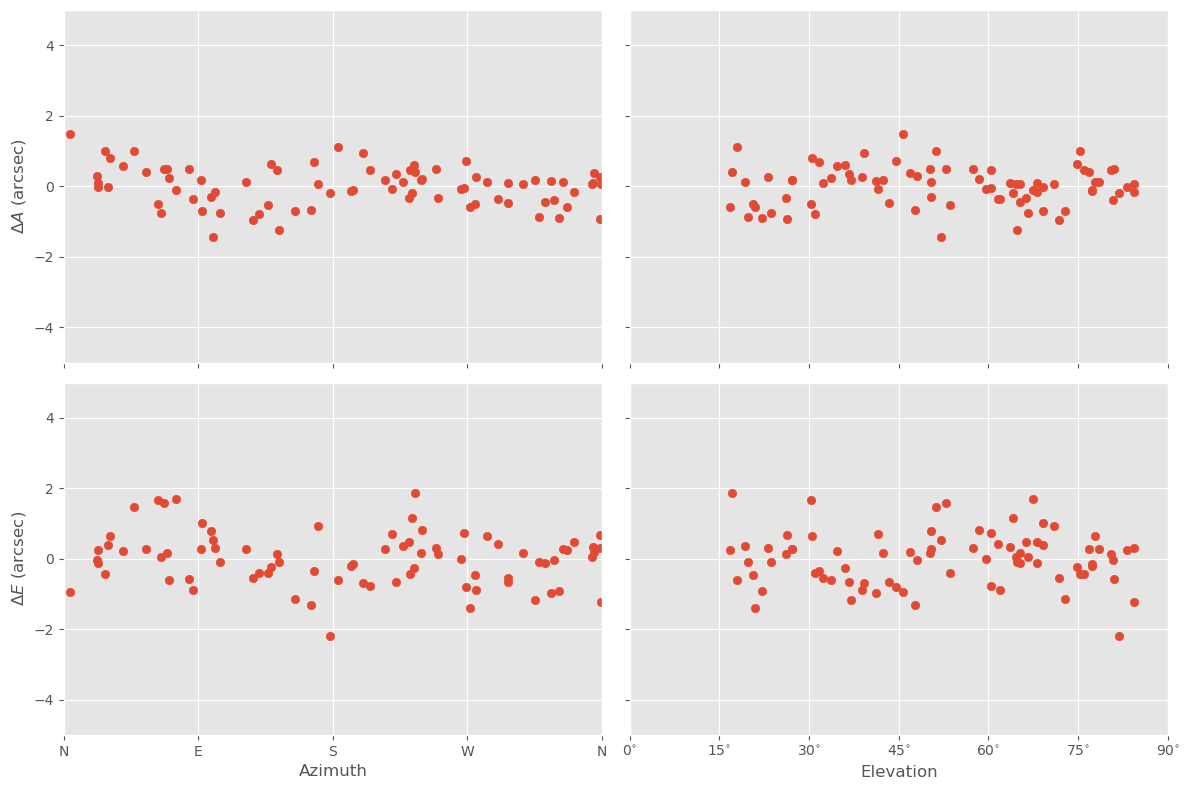

In [14]:
f = pointing_azel_resid(coo_ref, mc_coo)

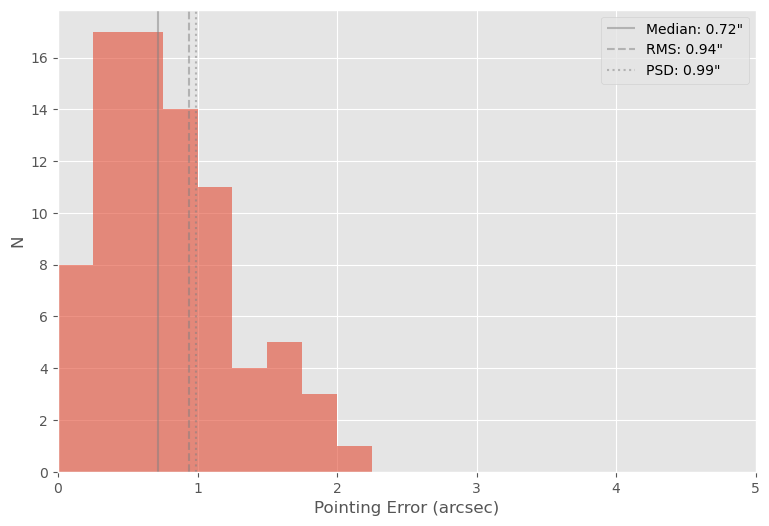

In [15]:
f = pointing_histogram(coo_ref, mc_coo)